In [1]:
import matplotlib.pyplot as plt
import pandas as pd


# folder date
data
    |
    timestamp
        |
        base
        | 
        test1
        |
        test2
            |
            Golang
            |
            python
                |
                mergesort
                |
                quicksort
                        |
                        timmings
                        | 
                        dtlb-1.csv
                        |
                        dtlb-2.csv
                        |
                        dtlb-..csv
                        |
                        dtlb-base.csv
                        |
                        caceh-1.csv

                        

            

In [2]:
test_folder_names = ["2024-05-02-10-25-11"]

test_languages = ["golang","c_plus_plus", "pypy" ,"cpython",]

test_algorithm = ["mergesort","quicksort"]

test_data_measurments = ["perf-dTLB-misses","perf-cache-miss","timings"]

test_data_type = ["Full shuffeld list", "Partially shuffeld list", ] # "Reversed list", "Sorted list"]



test_repeats = 8

base_dict = {}


# Read and make avearage time for base cases


In [5]:

for measurement in test_data_measurments:

    for i in range(1,len(test_data_type)): # test data type
        
        
        for algorithm in test_algorithm:
            id = 0
            baseDataFrame = pd.DataFrame()
            
            for language in test_languages:     
            
                temp = []
                df = pd.DataFrame({'2': [], '4': [], '8': [], '16': [], '32': [], '64': []})
            
                for testnum in range(1,test_repeats+1):
                    
                    base_path = "../data/{}/base-{}/{}/{}/{}-base.csv".format(test_folder_names[0],testnum, language, algorithm, measurement)
                    base_file = pd.read_csv(base_path,header=None)
                    #print("DEBUG: Lan {}, Algo {}, {}, testnum: {}".format(language, algorithm, measurement,testnum))
                    base_file.columns = ['2', '4', '8', '16', '32', '64']
                                    
                    temp.append(base_file)
                    

                df = pd.concat(temp, ignore_index=True)
                mean_values = df.mean()        
                # Convert mean_values to a DataFrame
                

                mean_df = pd.DataFrame(mean_values, columns=[language])
            
                # Display the new DataFrame
                baseDataFrame.insert(id,language, mean_df)
                id += 1
            
            
            #print("DEBUG: Algo {}, Measure {}, data type {}".format( algorithm, measurement,i))
            #display(baseDataFrame)
            base_dict[(algorithm, measurement)] = baseDataFrame
#print(base_dict)

        

DEBUG: Lan golang, Algo mergesort, perf-dTLB-misses, testnum: 1
DEBUG: Lan golang, Algo mergesort, perf-dTLB-misses, testnum: 2
DEBUG: Lan golang, Algo mergesort, perf-dTLB-misses, testnum: 3
DEBUG: Lan golang, Algo mergesort, perf-dTLB-misses, testnum: 4
DEBUG: Lan golang, Algo mergesort, perf-dTLB-misses, testnum: 5
DEBUG: Lan golang, Algo mergesort, perf-dTLB-misses, testnum: 6
DEBUG: Lan golang, Algo mergesort, perf-dTLB-misses, testnum: 7
DEBUG: Lan golang, Algo mergesort, perf-dTLB-misses, testnum: 8
DEBUG: Lan c_plus_plus, Algo mergesort, perf-dTLB-misses, testnum: 1
DEBUG: Lan c_plus_plus, Algo mergesort, perf-dTLB-misses, testnum: 2
DEBUG: Lan c_plus_plus, Algo mergesort, perf-dTLB-misses, testnum: 3
DEBUG: Lan c_plus_plus, Algo mergesort, perf-dTLB-misses, testnum: 4
DEBUG: Lan c_plus_plus, Algo mergesort, perf-dTLB-misses, testnum: 5
DEBUG: Lan c_plus_plus, Algo mergesort, perf-dTLB-misses, testnum: 6
DEBUG: Lan c_plus_plus, Algo mergesort, perf-dTLB-misses, testnum: 7
DEBUG

# Read and make avarage time


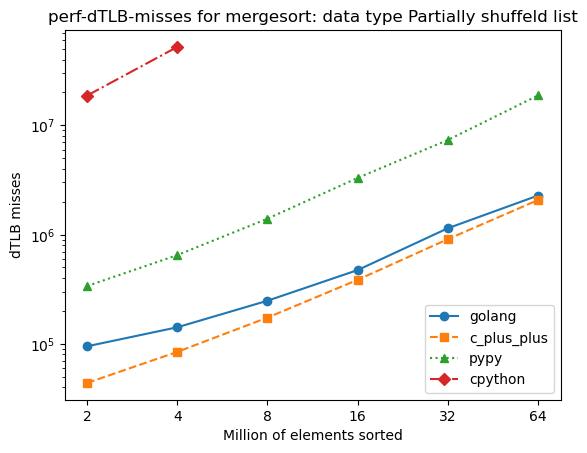

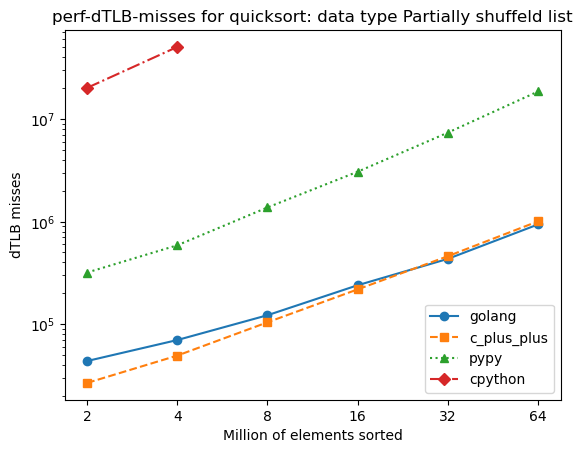

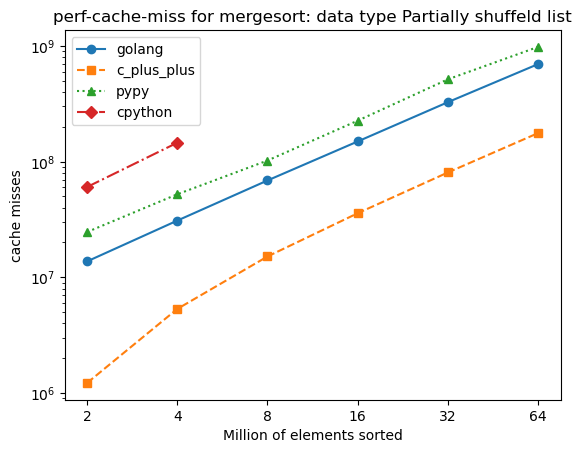

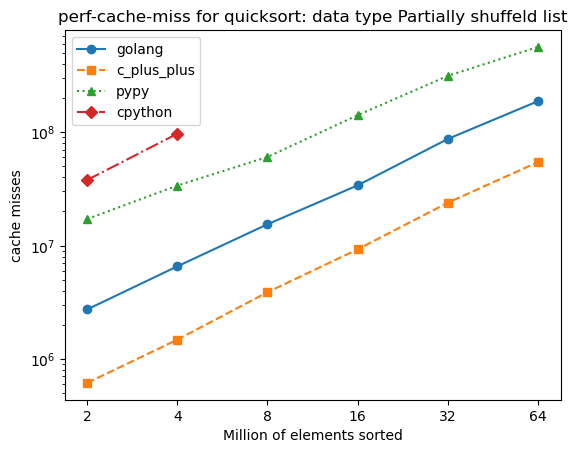

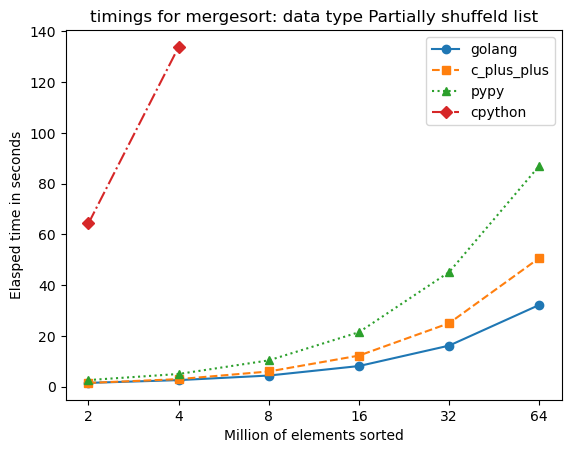

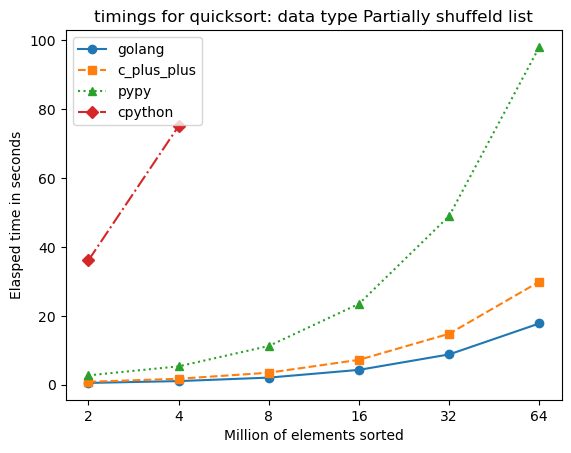

In [21]:

for measurement in test_data_measurments:

    for i in range(1,len(test_data_type)): # test data type
        
        
        for algorithm in test_algorithm:
            id = 0
            asd = pd.DataFrame()
            
            for language in test_languages:     
            
                temp = []
                df = pd.DataFrame({'2': [], '4': [], '8': [], '16': [], '32': [], '64': []})
            
                for testnum in range(1,test_repeats+1):
                    
                
                    
                    path = "../data/{}/test-{}/{}/{}/{}-{}.csv".format(test_folder_names[0], testnum, language, algorithm, measurement,i)
                    file = pd.read_csv(path,header=None)
                    #print("DEBUG: Lan {}, Algo {}, {}, testnum: {}".format(language, algorithm, measurement,testnum))
                    if language == "cpython":
                        file.insert(2,2,[None])
                        file.insert(3,3,[None])
                        
                        file.insert(4,4,[None])
                        file.insert(5,5,[None])
                        
                        
                    file.columns = ['2', '4', '8', '16', '32', '64']
                                    
                    temp.append(file)
                    

                df = pd.concat(temp, ignore_index=True)
                mean_values = df.mean()        
                # Convert mean_values to a DataFrame
                

                mean_df = pd.DataFrame(mean_values, columns=[language])
            
                # Display the new DataFrame
                asd.insert(id,language, mean_df)
                id += 1
            
            # print("----------------")
            # display(asd)
            
           # asd = asd.sub(base_dict[algorithm, measurement])
            # display(asd)
            # print("----------------")
            
            
            # print("DEBUG: Lan {}, Algo {}, Measure {}, data type {}".format(language, algorithm, measurement,i))
          
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

            line_styles = ['-', '--', ':', '-.']

            marker_styles = ['o', 's', '^', 'D']


            for x, column in enumerate(asd.columns):
                asd[column].plot(color=colors[x], linestyle=line_styles[x], marker=marker_styles[x], label=column,)


            plt.title("{} for {}: data type {}".format(measurement,algorithm,test_data_type[i]))
            plt.xlabel("Million of elements sorted")
            
            if(measurement == "perf-dTLB-misses"):
                plt.ylabel("dTLB misses")
                plt.yscale("log")  
            elif(measurement == "perf-cache-miss"):
                plt.ylabel("cache misses")
                plt.yscale("log")  
                
            elif(measurement == "timings"):
                plt.ylabel("Elasped time in seconds")
                
            else:
                plt.ylabel(measurement)    
            plt.legend()
                       
            plt.show()
            
            del asd
        
    
            
